<a href="https://colab.research.google.com/github/ramiredddy/CROP-PRICE-PREDICTION/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv

In [2]:
from google.colab import files
uploaded = files.upload()

Saving datasetup.csv to datasetup.csv


In [3]:
import io
crop = pd.read_csv(io.BytesIO(uploaded['datasetup.csv'])) # Remove the extra space before 'datasetup' in the key

In [5]:
crop.head()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature
0,69,321,33668,0.0030,0.0391,2763.2,1139,26.60
1,109,300,34352,0.0186,0.0378,3080.9,864,26.85
2,189,511,35796,0.0430,0.0430,2620.2,1080,27.00
3,59,90,41572,0.1608,0.0381,2355.9,945,27.30
4,53,73,47728,0.1482,0.0377,2460.1,1309,27.31


In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15104 entries, 0 to 15103
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    15104 non-null  int64  
 1   Production              15104 non-null  int64  
 2   GDP                     15104 non-null  int64  
 3   Annual Growth Rate (%)  15104 non-null  float64
 4   Inflation               15104 non-null  float64
 5   Rainfall                15104 non-null  float64
 6   Price                   15104 non-null  int64  
 7   Temparature             14396 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 944.1 KB


In [7]:
crop['Price'].value_counts()

,count
Price,
1009,1701
1284,939
1094,923
1309,895
1030,866
1494,866
1139,861
1575,856
1110,850


In [8]:
crop['Area'].value_counts()

,count
Area,
1000,136
9000,102
9,82
99000,66
1,62
...,...
453996,1
989645,1
99681,1


In [9]:
crop.describe()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature
count,1.510400e+04,1.510400e+04,15104.000000,15104.000000,15104.000000,15104.000000,15104.000000,14396.000000
mean,2.049292e+06,1.062945e+05,69566.345339,0.089930,0.072691,1615.374378,1166.028204,24.920767
std,7.868913e+07,1.738664e+05,32009.523253,0.087498,0.031301,938.528063,201.516341,3.124370
min,1.000000e+00,0.000000e+00,31388.000000,-0.029000,0.037700,0.000000,864.000000,12.210000
25%,8.934500e+03,4.964750e+03,35796.000000,0.004000,0.042500,926.500000,1009.000000,23.940000
50%,5.998300e+04,3.041250e+04,61332.000000,0.074100,0.066500,1291.900000,1110.000000,25.760000
75%,1.931450e+05,1.350475e+05,103208.000000,0.148200,0.093100,2372.200000,1309.000000,26.750000
max,9.459455e+09,1.710000e+06,122056.000000,0.274700,0.132300,4229.400000,1575.000000,32.900000


In [10]:
%matplotlib inline

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Production'}>,
        <Axes: title={'center': 'GDP'}>],
       [<Axes: title={'center': 'Annual Growth Rate (%)'}>,
        <Axes: title={'center': 'Inflation'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Temparature'}>, <Axes: >]], dtype=object)

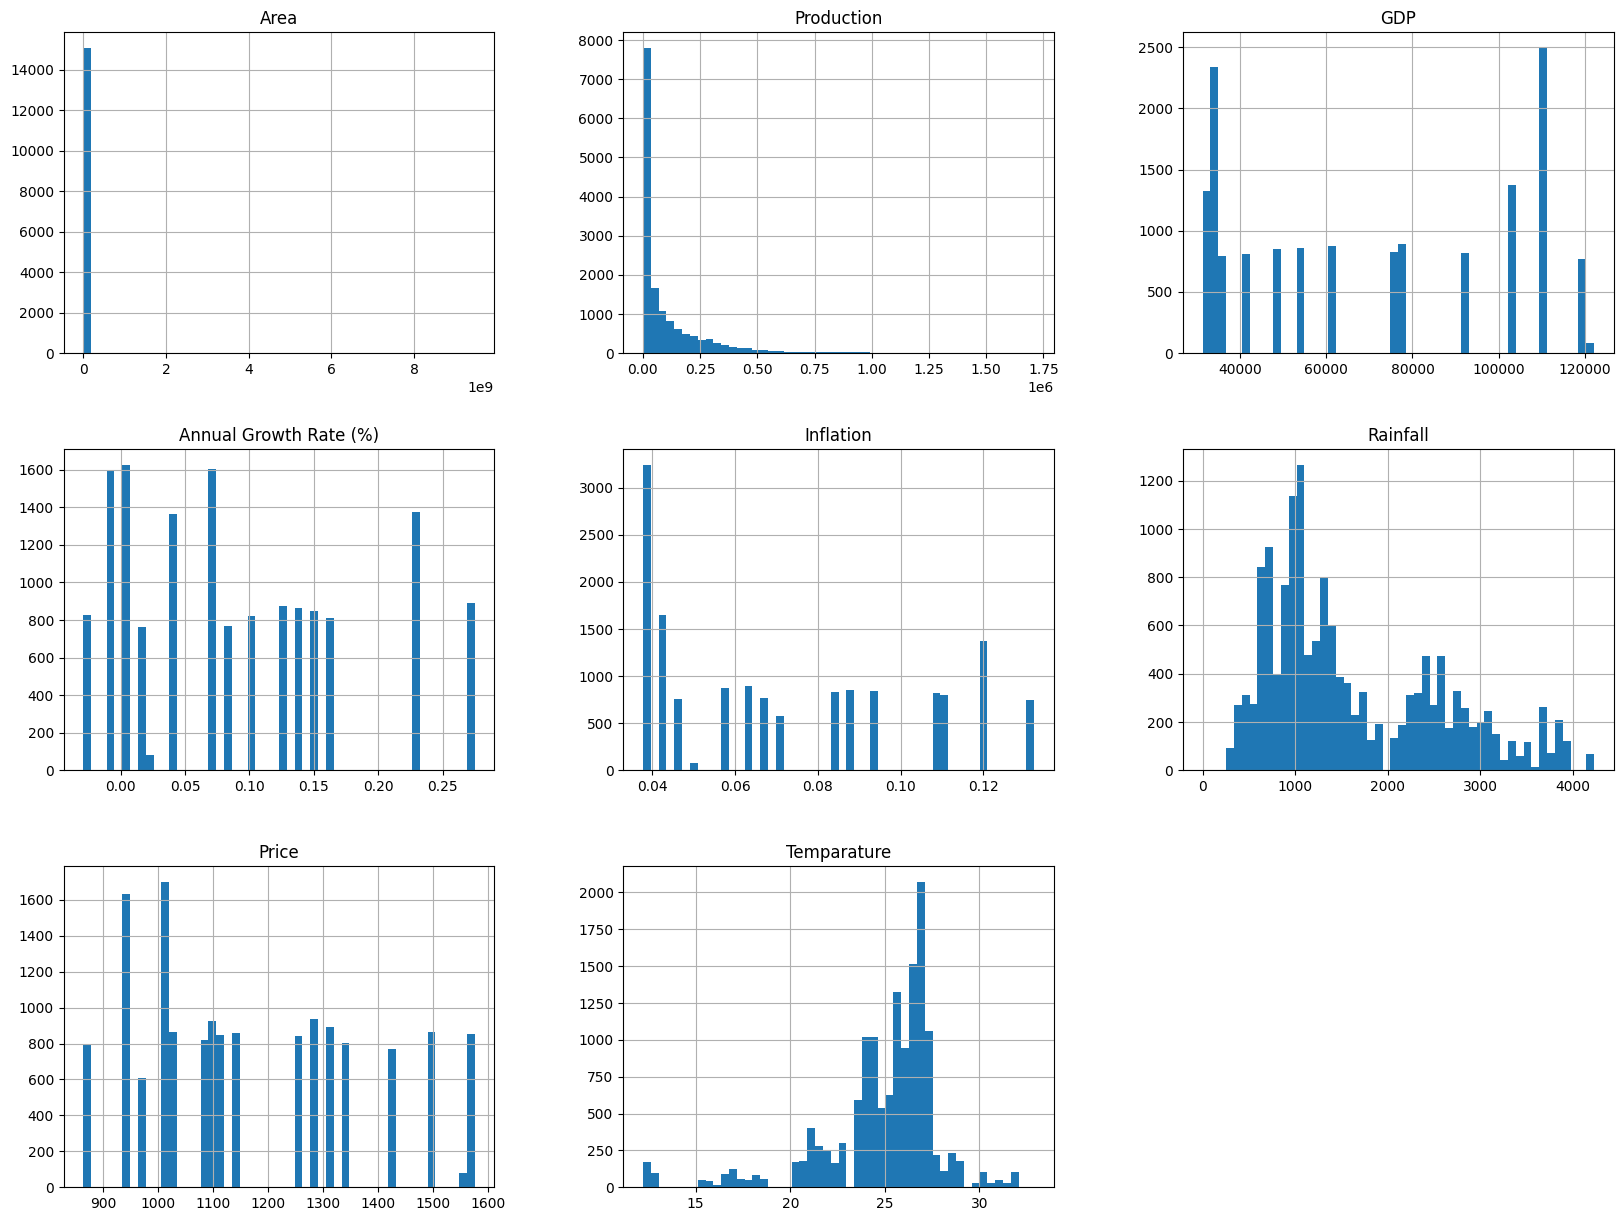

In [11]:

import matplotlib.pyplot as plt
crop.hist(bins=50, figsize=(20, 15))

In [12]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(crop, 0.2)

[ 8649  5563 10148 ...  5390   860  7270]


In [14]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 12084
Rows in test set: 3020



In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(crop, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 12083
Rows in test set: 3021



In [16]:
crop.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
crop.fillna(999, inplace=True)

In [18]:

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(crop, crop['Price']):
    strat_train_set = crop.loc[train_index]
    strat_test_set = crop.loc[test_index]

In [19]:
strat_train_set['Temparature'].value_counts()

,count
Temparature,
999.00,562
25.31,243
26.71,175
26.75,152
26.70,147
...,...
27.05,1
25.91,1
26.25,1


In [20]:
crop=strat_train_set.copy()


In [21]:
corr_matrix = crop.corr()
corr_matrix['Price'].sort_values(ascending=False)

,Price
Price,1.000000
GDP,0.571759
Inflation,0.243414
Production,0.011629
Area,-0.000863
Temparature,-0.014165
Rainfall,-0.022461
Annual Growth Rate (%),-0.062013


array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Inflation', ylabel='Price'>,
        <Axes: xlabel='Temparature', ylabel='Price'>,
        <Axes: xlabel='GDP', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='Inflation'>,
        <Axes: xlabel='Inflation', ylabel='Inflation'>,
        <Axes: xlabel='Temparature', ylabel='Inflation'>,
        <Axes: xlabel='GDP', ylabel='Inflation'>],
       [<Axes: xlabel='Price', ylabel='Temparature'>,
        <Axes: xlabel='Inflation', ylabel='Temparature'>,
        <Axes: xlabel='Temparature', ylabel='Temparature'>,
        <Axes: xlabel='GDP', ylabel='Temparature'>],
       [<Axes: xlabel='Price', ylabel='GDP'>,
        <Axes: xlabel='Inflation', ylabel='GDP'>,
        <Axes: xlabel='Temparature', ylabel='GDP'>,
        <Axes: xlabel='GDP', ylabel='GDP'>]], dtype=object)

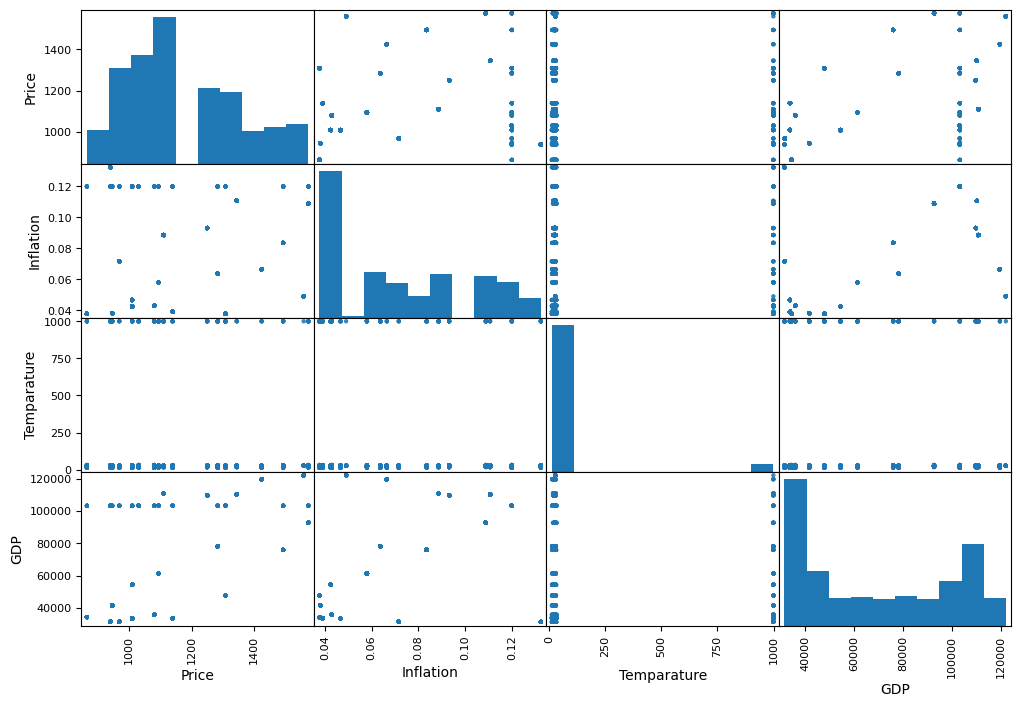

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["Price", "Inflation", "Temparature", "GDP"]
scatter_matrix(crop[attributes], figsize = (12,8))

<Axes: xlabel='GDP', ylabel='Price'>

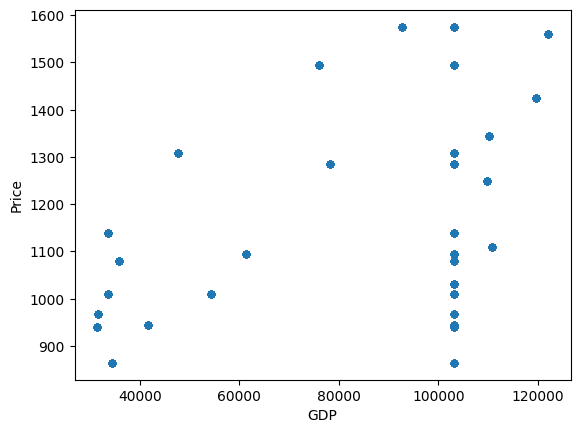

In [23]:
crop.plot(kind="scatter", x="GDP", y="Price", alpha=0.8)

<Axes: xlabel='Annual Growth Rate (%)', ylabel='Price'>

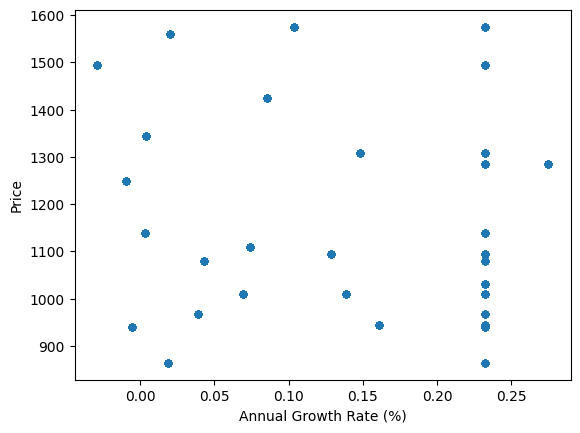

In [24]:
crop.plot(kind="scatter", x="Annual Growth Rate (%)", y="Price", alpha=0.8)

In [25]:
crop["prod"] = crop['Production']/crop['Area']

In [26]:
crop.head()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature,prod
5130,45159,3241,47728,0.1482,0.0377,1136.6,1309,999.00,0.071769
590,4506,574,110808,0.0741,0.0886,2193.7,1110,22.75,0.127386
5681,909458,47154,92645,0.1036,0.1088,3862.0,1575,24.25,0.051848
4022,31454589,411096,34352,0.0186,0.0378,1600.1,864,26.50,0.013070
315,4545900,133400,31388,-0.0053,0.1323,948.1,939,31.10,0.029345


In [27]:
crop = strat_train_set.drop("Price", axis=1)
crop_labels = strat_train_set["Price"].copy()

In [28]:
median = crop["Temparature"].median()

In [29]:
crop["Temparature"].fillna(median)

,Temparature
5130,999.00
590,22.75
5681,24.25
4022,26.50
315,31.10
...,...
10470,27.50
13057,26.65
9569,27.45
14031,20.60


In [30]:
crop.shape

(12083, 7)

In [31]:
crop.describe()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Temparature
count,1.208300e+04,1.208300e+04,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,2.221917e+06,1.065098e+05,69530.411901,0.089924,0.072659,1614.869974,70.230738
std,8.773076e+07,1.735096e+05,32022.670371,0.087485,0.031285,938.245202,205.161995
min,1.000000e+00,0.000000e+00,31388.000000,-0.029000,0.037700,0.000000,12.210000
25%,8.959000e+03,5.000000e+03,35796.000000,0.004000,0.042500,926.500000,24.080000
50%,6.060900e+04,3.067000e+04,61332.000000,0.074100,0.066500,1291.900000,25.850000
75%,1.931260e+05,1.350530e+05,103208.000000,0.148200,0.093100,2372.200000,26.820000
max,9.459455e+09,1.710000e+06,122056.000000,0.274700,0.132300,4229.400000,999.000000


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(crop)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([6.0609e+04, 3.0670e+04, 6.1332e+04, 7.4100e-02, 6.6500e-02,
       1.2919e+03, 2.5850e+01])

In [34]:
X = imputer.transform(crop)

In [35]:
crop_tr = pd.DataFrame(X, columns=crop.columns)


In [36]:
crop_tr.describe()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Temparature
count,1.208300e+04,1.208300e+04,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,2.221917e+06,1.065098e+05,69530.411901,0.089924,0.072659,1614.869974,70.230738
std,8.773076e+07,1.735096e+05,32022.670371,0.087485,0.031285,938.245202,205.161995
min,1.000000e+00,0.000000e+00,31388.000000,-0.029000,0.037700,0.000000,12.210000
25%,8.959000e+03,5.000000e+03,35796.000000,0.004000,0.042500,926.500000,24.080000
50%,6.060900e+04,3.067000e+04,61332.000000,0.074100,0.066500,1291.900000,25.850000
75%,1.931260e+05,1.350530e+05,103208.000000,0.148200,0.093100,2372.200000,26.820000
max,9.459455e+09,1.710000e+06,122056.000000,0.274700,0.132300,4229.400000,999.000000


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [38]:
crop_num_tr = my_pipeline.fit_transform(crop)

In [39]:
crop_num_tr.shape

(12083, 7)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
#model = SVC()
model.fit(crop_num_tr, crop_labels)

RandomForestRegressor()

In [41]:
some_data = crop.iloc[:5]

In [42]:
some_labels =crop_labels.iloc[:5]


In [43]:
prepared_data = my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([1309., 1110., 1575.,  864.,  939.])

In [45]:
list(some_labels)

[1309, 1110, 1575, 864, 939]

In [46]:
from sklearn.metrics import mean_squared_error
crop_predictions = model.predict(crop_num_tr)
mse = mean_squared_error(crop_labels, crop_predictions)
rmse = np.sqrt(mse)

In [47]:
rmse

1.3284507625249788

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, crop_num_tr, crop_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [49]:
rmse_scores

array([5.40938888, 3.83559957, 5.17487307, 2.14331245, 3.87389402,
       4.55096914, 4.45847278, 3.43092857, 4.55508771, 4.42777983])

In [50]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [51]:
print_scores(rmse_scores)

Scores: [5.40938888 3.83559957 5.17487307 2.14331245 3.87389402 4.55096914
 4.45847278 3.43092857 4.55508771 4.42777983]
Mean:  4.186030600615849
Standard deviation:  0.8854136483273704


In [52]:
from joblib import dump, load
dump(model,'data')

['data']

In [53]:
X_test = strat_test_set.drop("Price", axis=1)
Y_test = strat_test_set["Price"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[1425. 1309. 1009. ... 1030. 1425. 1284.] [1425, 1309, 1009, 1080, 1030, 1009, 1139, 1494, 1080, 1030, 1094, 1575, 968, 1309, 1080, 1284, 1139, 1110, 1094, 1309, 1309, 968, 1250, 1494, 1345, 1110, 1425, 1080, 1080, 864, 1110, 1250, 1009, 1009, 1250, 1494, 1425, 968, 1110, 1284, 939, 968, 1309, 1080, 1284, 1309, 1575, 1575, 1094, 945, 1284, 1030, 945, 1494, 864, 1575, 1250, 1345, 1080, 1425, 1494, 1575, 1009, 1425, 1030, 1139, 1094, 1030, 1425, 968, 939, 1139, 945, 1575, 945, 1284, 864, 1009, 1009, 1009, 1094, 1575, 1110, 1494, 1009, 1009, 1110, 1009, 1575, 864, 1009, 1094, 1110, 1009, 1094, 1425, 1560, 1575, 1094, 1009, 1009, 1110, 1009, 1309, 1080, 1110, 1030, 1110, 864, 1080, 1494, 1009, 1080, 1284, 1110, 968, 939, 1250, 1110, 1309, 1094, 1560, 1009, 1110, 1494, 945, 1345, 1110, 1030, 1575, 1250, 939, 1345, 1080, 1080, 1080, 1345, 1009, 1345, 1425, 1494, 1094, 864, 1094, 1009, 1030, 1425, 1309, 968, 1494, 1009, 1345, 1030, 1575, 1575, 1094, 1425, 939, 1139, 1494, 1110, 1345, 1139, 14

In [54]:
final_rmse

2.694485209864169

In [55]:
prepared_data[3]

array([ 0.33322272,  1.75551608, -1.09859257, -0.81530504, -1.11427417,
       -0.01574278, -0.21316106])

In [56]:
from joblib import dump, load
import numpy as np
model = load('data')
features = np.array([[ 3.8355621 ,  1.75007939, -1.09485194, -0.81596876, -1.11856645,
       -0.02170678, -0.21427209]])
model.predict(features)

array([1309.])

In [57]:
##import pandas as pd
import csv
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from joblib import dump, load


In [59]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [60]:
import sklearn
import matplotlib
import joblib
print("NUmpy",np.__version__)
print("Pandas",pd.__version__)
print("Sklearn",sklearn.__version__)
print("matplotlib:",matplotlib.__version__)
print("Joblib",joblib.__version__)

NUmpy 1.26.4
Pandas 2.2.2
Sklearn 1.5.2
matplotlib: 3.8.0
Joblib 1.4.2
